Original code written by Sam Chen 2023 at University of Florida for MeLD lab.

Extracting data from average f1 scores and plotting it

Basic code to read data from the files and get the weighted average

In [35]:
import matplotlib.pyplot as plt
import os 

class filesToRead:
    def __init__(self):
        self.fileList = []
        self.precision = False
        self.recall = False
        self.f1Score = False
        self.catList = []

    def addFile(self, fileStr):
        self.fileList.append(fileStr)
    
    def addCatList(self, list):
        for x in list:
            self.catList.append(x)
    
    def addFileFromFolder(self, folderPath):
        for filename in os.listdir(folderPath):
            if filename.endswith('_results.txt'):
                f = os.path.join(folderPath, filename)
                self.addFile(f)
                
    def getFileList(self):
        return len(self.fileList)

    def readWeightedAvg(self):
        #Get all the files and read them
        avgList = [[],[],[]]
        for x in sorted(self.fileList):
            File_results = open(x)
            File_object = File_results.readlines()
            #Find the weighted avg line in the file and split the line into a list using space delimination
            for txt in File_object:
                if "precision" in txt:
                    precisionCol = txt.split().index("precision")
                if "recall" in txt:
                    recallCol = txt.split().index("recall")
                if "f1-score" in txt:
                    f1Col = txt.split().index("f1-score")
                if "weighted avg" in txt:
                    s = txt.split()
                
            #Adds to a list the score avg(fifth item in list because weighted avg takes up 2 spaces in list)
            if self.precision:
                avgList[0].append(float(s[2+precisionCol]))
            if self.recall:
                avgList[1].append(float(s[2+recallCol]))
            if self.f1Score:
                avgList[2].append(float(s[2+f1Col]))
        return avgList
    
    def readCategories(self):
        list = [[] for _ in range(3 * len(self.catList))]
        for x in sorted(self.fileList):
            confusionTrack = False
            File_results = open(x)
            File_object = File_results.readlines()
            for txt in File_object:
                s = txt.split()
                if "precision" in txt:
                    precisionCol = txt.split().index("precision")
                if "recall" in txt:
                    recallCol = txt.split().index("recall")
                if "f1-score" in txt:
                    f1Col = txt.split().index("f1-score")
                if "Confusion Matrix" in txt:
                    confusionTrack = True
                if not confusionTrack and s:
                    if s[0] in self.catList:
                        if not list[self.catList.index(s[0])*3]:
                            list[self.catList.index(s[0])*3].append("precision: " + s[0])
                            list[self.catList.index(s[0])*3 + 1].append("recall: " + s[0])
                            list[self.catList.index(s[0])*3 + 2].append("f1: " + s[0])
                        list[self.catList.index(s[0]) * 3].append(float(s[1+precisionCol]))
                        list[self.catList.index(s[0]) * 3 + 1].append(float(s[1+recallCol]))
                        list[self.catList.index(s[0]) * 3 + 2].append(float(s[1+f1Col]))
        return list
    
    def readNumCategories(self): 
        numList = []
        for x in sorted(self.fileList):
            track = 0
            start = False
            File_results = open(x)
            File_object = File_results.readlines()
            for txt in File_object:
                if start and not txt.isspace():
                    track += 1
                if "precision" in txt:
                    start = True
                if "accuracy" in txt:
                    start = False
            numList.append(track)
        return numList
    

Function that takes in the list returned from reading the files and plots it

In [36]:
def createGraph(n, fileClass, name):
    #list that have all ints from 1 to len of n
    xl = list(range(1, len(n[0])+1))
    x2 = list(range(1, len(n[1])+1))
    x3 = list(range(1, len(n[2])+1))
    
    #plot with x as the number of values in n, and y is list n
    plt.plot(xl, n[0], marker = 'o', label = "Precision")
    plt.plot(x2, n[1], marker = 'x', label = "Recall")
    plt.plot(x3, n[2], marker = 'v', label = "F1-Score")
    plt.legend(loc="upper left")
    plt.xlim(1, fileClass.getFileList())
    plt.locator_params(axis="x", integer=True, tight=True)
    plt.ylim(0,1)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel("Training Iterations")
    plt.ylabel("Weighted Average")
    label = plt.gca()
    for tick in label.get_xticklabels():
        tick.set_color("red")

    for tick in label.get_yticklabels():
        tick.set_color("red")
    plt.tick_params(axis="both", color = "red")
    plt.savefig(name)
    plt.show()
    plt.close()


In [37]:
def createNumCatGraph(n, fileClass, name):
    xl = list(range(1, len(n)+1))

    plt.plot(xl, n, marker = 'o', label = "# Of Categories")
    
    plt.legend(loc="upper left")
    plt.xlim(1, fileClass.getFileList())
    plt.ylim(1, max(n)+1)
    plt.locator_params(axis="x", integer=True, tight=True)
    plt.xlabel("Training Iterations")
    plt.ylabel("Categories")
    label = plt.gca()
    for tick in label.get_xticklabels():
        tick.set_color("red")

    for tick in label.get_yticklabels():
        tick.set_color("red")
    plt.tick_params(axis="both", color = "red")
    plt.savefig(name)
    plt.show()
    plt.close()
  

In [38]:
def createCatGraph(n, fileClass, name):
    print(len(n[0]))
    for i in range(1, len(n), 1):
        print(n[i][0])
        plt.plot(list(range(1, len(n[0]))), n[i][1:], marker = 'o', label = str(n[i][0]))
    plt.xlim(1, fileClass.getFileList())
    plt.xlabel("Training Iterations")
    plt.ylabel("Score")
    plt.legend(loc="upper left")
    plt.locator_params(axis="x", integer=True, tight=True)
    plt.tick_params(axis="both", color = "red")
    plt.show

Driver code to run functions

Enter the folder name: ./Alberta/bkft_reports


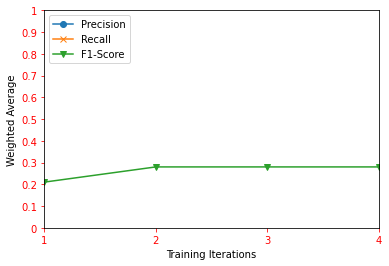

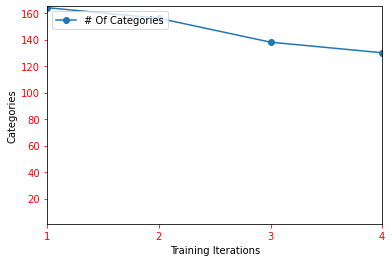

0


IndexError: list index out of range

In [42]:
fileReader = filesToRead()

#set to true whatever variable you want to show up on graph
fileReader.f1Score = True
fileReader.precision = False
fileReader.recall = False

#Add whatever files you need here: below is an example of how to do it
#tester.addFile("What is your folder pathname?")

#asks user for the folder name
folder_name = input("Enter the folder name: ")
#search the current directory for the folder name and get the path
folder_path = os.path.join(os.getcwd(), folder_name)
#check if the path exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    fileReader.addFileFromFolder(folder_path)
else:
    print("Invalid folder path. Please provide a valid folder name.")

#calls the functions to read files and print out the graph
r1 = fileReader.readWeightedAvg()
r2 = fileReader.readNumCategories()
fileReader.addCatList(["N", "V"])
r3 = fileReader.readCategories()
createGraph(r1, fileReader, folder_name+" wghtd_avgs")
createNumCatGraph(r2, fileReader, folder_name + " #_of_categories")
createCatGraph(r3, fileReader, folder_name + " categories")


# TODO

* Create a second chart that shows how the number of categories changes (i.e. number of after label "precision...recall...etc" and the "accuracy" line, not including blank lines) over each iteration 
* user should be able to designate a folder pathname. The code will add only relevant files (ending in \_results.txt, altho that might change) from that folder
##### Lower priority
* Let user choose category (from first column on lines between labels and scores) and create a chart that shows all or any of its precision, recall, and F1 score (2nd, 3rd, 4th columns)